<img src="ML_Supervised_Header.png">

<font size="6"><b>DataScience Portfolio</b></font>   
<font size="4"><b>Enrique Otero Espinosa</b></font>   
<font size="4"><b>https://github.com/eoroot1974/DataSciencePortfolio</b></font>

<font size="4"><b>Machine Learning Supervised Algorithms</b></font>   
<font size="4">Univariate Linear Regression</font>

<font size="4">Project Name:</font>    
<span style='color:DarkBlue'>Project_LRU-CO2_vs_TempAnomalies</span>   
<font size="4">Project Location:</font>    
<a href="https://github.com/eoroot1974/DataSciencePortfolio/tree/main/MachineLearning/SupervisedLearning/LinearRegressionUnivariate/Project_LRU-CO2_vs_TempAnomalies" style="color:DarkBlue">Linear Regression Project: CO2 vs Temp Anomalies</a>   
<font size="4">Date:</font>    
<span style='color:DarkBlue'>July 24th, 2024</span> 

***
<span style='color:DarkBlue'><font size="4"><strong>TABLE OF CONTENTS</strong></font></span>   

[Overview](#0-Overview)   
[1. Libraries](#1-LoadLib)   
[2. Data Loading and Data Description](#2-DataLD)  
[3. Exploratory Data Analysis (EDA)](#3-EDA)  
&nbsp;&nbsp;[3.1. Dataset Structure and Data types](#31-DataStructureandTypes)  
&nbsp;&nbsp;[3.2. Basic statistical information](#32-BasicStatInfo)  
&nbsp;&nbsp;[3.3. Graphical dataset analysis](#33-GraphAnalysis)  
&nbsp;&nbsp;&nbsp;&nbsp;[3.3.1. Variables Graphical analysis - Univariate](#331-GraphAnalysisVariableU)  
&nbsp;&nbsp;&nbsp;&nbsp;[3.3.2. Statistical Graphical analysis - Histograms and Correlation](#332-StatAnalysisVariable)  
&nbsp;&nbsp;[3.4. Model Suitability Statistical Tests](#34-ModelTests)  
[4. Model Training](#4-Train)  
[5. Model Predictions](#5-Pred)  
[6. Model Results and Evaluation](#6-Results)  
***

In [7]:
%%html
<style>
table {float:left}
</style>

# Overview <a class="anchor" id="0-Overview"></a>

<font size="5"><b>CO2 Concentration vs Temperature: Univariate Linear Regression Analysis</b></font>   
This project demonstrates a simple univariate linear regression model used to explore the relationship between atmospheric CO2 concentration (in parts per million) and global temperature (in Celsius). The dataset contains 200 synthetic data points representing CO2 concentration and corresponding temperatures, with added noise to simulate real-world data.   

<font size="4"><b>Project Features</b></font>   
* __Synthetic Dataset Generation:__ A dataset of 200 data points is generated where CO2 concentration is the independent variable and temperature is the dependent variable.   
* __Exploratory Data Analysis (EDA):__ A comprehensive EDA is performed to visualize data trends, and statistical tests are applied to check whether linear regression is suitable. This includes:   
_Scatter plot and correlation analysis._   
_Checking linearity, normality of residuals, and homoscedasticity._   
_Shapiro-Wilk test for normality._   
_Breusch-Pagan test for homoscedasticity._   
_Variance Inflation Factor (VIF) check for multicollinearity._   
* __Linear Regression Model:__ A univariate linear regression model is applied to quantify the relationship between CO2 concentration and temperature.   
* __Data Visualization:__ Scatter plots and regression line plots are used to visualize the correlation between CO2 concentration and temperature.   
* __Performance Metrics:__ Key metrics such as R-squared and Mean Squared Error (MSE) are used to evaluate the performance of the model.   

<font size="4"><b>Purpose</b></font>   
The aim of this project is to showcase the use of linear regression to identify trends in climate-related data, which can be useful for understanding the broader impacts of rising CO2 levels on global temperatures.

<font size="4"><b>Usage</b></font>   
Exploratory Data Analysis: Perform EDA and statistical tests to confirm whether linear regression is a suitable model for the data.
Model Training: The linear regression model is trained on the dataset to predict the atmosphere temperature based on CO2 concentration.
Results: Visual and numerical analysis of the model's performance is provided.

<font size="4"><b>Requirements</b></font>   
Python 3.x
NumPy
Pandas
Matplotlib
scikit-learn
statsmodels

<font size="4"><b>Conclusion</b></font>   
This project demonstrates the predictive capabilities of simple linear regression in climate science, offering insights into how CO2 levels affect temperature trends. By including EDA and statistical validation, it ensures the linear regression model is applied appropriately to the data.

# 1. Libraries <a class="anchor" id="1-LoadLib"></a>

In [11]:
# Data manipulation and numerical operations
import os # For OS data files and names manipulation
import numpy as np  # For numerical calculations and generating synthetic data
import pandas as pd  # For handling and manipulating data in tabular format

# Visualization libraries
import matplotlib.pyplot as plt  # For creating data visualizations
import seaborn as sns  # For enhanced data visualizations, like correlation plots

# Linear regression and performance metrics
import statsmodels.api as sm # Provides functions for statistical models, including OLS regression
from statsmodels.formula.api import ols # For building regression models using ordinary least squares (OLS) method
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating regression model performance

# EDA and statistical tests
from scipy import stats  # For performing statistical tests like the Shapiro-Wilk test
from statsmodels.stats.diagnostic import het_breuschpagan  # For checking homoscedasticity
from statsmodels.stats.outliers_influence import variance_inflation_factor  # For checking multicollinearity (VIF)
from statsmodels.api import add_constant  # To add a constant term to the regression for statsmodels

# Linear Regression Modeling libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# To ignore warnings (optional)
import warnings  
warnings.filterwarnings('ignore')  # To suppress warnings for cleaner output


# 2. Data Loading and Data Description <a class="anchor" id="2-DataLD"></a>

In [13]:
# Load the dataset from the CSV file
data_path = '/home/dsninja/Documents/Shared/WorkArea/Anaconda/JupiterProjects/Project_LRU-CO2_vs_TempAnomalies/data'
date_file_name = 'CO2_Temperature_Dataset.csv'

full_file_path = os.path.join(data_path, date_file_name)
Tco2 = pd.read_csv(full_file_path)

# Display the first few rows to inspect the data
Tco2.head()

,CO2_concentration_ppm,Temperature_Celsius
0,300.000000,16.248357
1,300.753769,15.945943
2,301.507538,16.353995
3,302.261307,16.806741
4,303.015075,15.943225


<font size="4"><b>Explanation of the Dataset columns</b></font>   

| Variable Name              | Variable Description                | Variable Type     | Metric Unit             | LR type               |
|:---------------------------|:------------------------------------|:------------------|-------------------------|----------------------:|
| __CO2_concentration_ppm__  | Atmospheric CO2 concentration level | Numeric           | Parts per million (ppm) | Independent           |
| __Temperature_Celsius__    | Atmospheric temperature             | Numeric           | Degrees Celsius (°C)    | Dependent             |   

# 3. Exploratory Data analysis (EDA) <a class="anchor" id="3-EDA"></a>

## 3.1. Dataset Structure and Data types <a class="anchor" id="31-DataStructureandTypes"></a>

In [18]:
# Display the shape (dimensions) of the dataset
print("Dataset shape:", Tco2.shape)

# Display the data types of each column
print("\nData types:\n", Tco2.dtypes)

Dataset shape: (200, 2)

Data types:
 CO2_concentration_ppm    float64
Temperature_Celsius      float64
dtype: object


The following information can be extracted:   
__Dataset Shape: (200, 2)__ The dataset has 200 rows and 2 columns. Each row corresponds to a single observation, which includes one value for the CO2 concentration and one for the temperature.   
The two columns represent the variables you are analyzing: CO2 concentration and Temperature.  

__Data Types:__   
__CO2_concentration_ppm:__ _float64_   
This means the CO2 concentration values are stored as floating-point numbers (decimal values).   
The precision float64 indicates a 64-bit floating-point number, which can handle large ranges of decimal values.   
__Temperature_Celsius:__ _float64_   
Similarly, the temperature values are also stored as floating-point numbers, allowing for decimal precision in the temperature readings.

<font size="4"><b>Null or NaN values in Dataset</b></font>   
You can check for null or NaN values in your dataset using the isnull() and sum() functions from pandas. Here’s the code to find if there are any null or NaN values in your dataset:

In [21]:
# Check for null or NaN values in the dataset
null_values = Tco2.isnull().sum()

# Display the result
print("Null or NaN values in the dataset:\n", null_values)

Null or NaN values in the dataset:
 CO2_concentration_ppm    0
Temperature_Celsius      0
dtype: int64


No Null or Nan values are found in the dataset.

## 3.2. Basic statistical information <a class="anchor" id="32-BasicStatInfo"></a>

In [24]:
# Get basic statistical information about the dataset
statistical_summary = Tco2.describe()

# Display the result
print(statistical_summary)

       CO2_concentration_ppm  Temperature_Celsius
count             200.000000           200.000000
mean              375.000000            17.479615
std                43.627526             1.017792
min               300.000000            15.239340
25%               337.500000            16.700029
50%               375.000000            17.477939
75%               412.500000            18.300247
max               450.000000            20.058577


This statistical summary shows that the dataset contains 200 observations. The average CO2 concentration is __375 ppm__, with a standard deviation of __43.63 ppm__, ranging from 300 ppm to 450 ppm. The corresponding atmospheric temperatures have a mean of __17.48°C__, with a standard deviation of __1.02°C__, ranging from 15.24°C to 20.06°C. The 25th percentile (Q1), 50th percentile (median or Q2), and 75th percentile (Q3) for both variables (CO2 concentration and temperature) are relatively evenly spaced. This suggests that the distribution of values doesn't show extreme skewness and that the values are spread relatively symmetrically between the minimum and maximum, indicating a balanced distribution around the mean.

<font size="4"><b>Initial Outlier Detection</b></font>   
Detecting outliers before univariate linear regression is crucial because they can disproportionately influence the model fit, violate linearity assumptions, and reduce predictive power. Outliers can also distort statistical inferences and complicate result interpretation. Addressing them ensures a more reliable and valid analysis, ultimately leading to better insights.   
To detect outliers, one common method is to use the Z-score or IQR (Interquartile Range) methods. Below is the code for detecting outliers using both techniques.

* __Using Z-score:__
The Z-score method calculates how far a data point is from the mean in terms of standard deviations. A common threshold is a Z-score of ±3.

* __Using IQR:__
The IQR method considers points outside the range of 1.5 times the IQR (difference between the 75th and 25th percentiles) as outliers.

In [27]:
# Calculate Z-scores for CO2 and Temperature
z_scores_CO2 = np.abs(stats.zscore(Tco2['CO2_concentration_ppm']))
z_scores_Temp = np.abs(stats.zscore(Tco2['Temperature_Celsius']))

# Define a threshold for Z-score (usually 3)
threshold = 3

# Identify outliers in both columns based on Z-score
outliers_Z_CO2 = Tco2[z_scores_CO2 > threshold]
outliers_Z_Temp = Tco2[z_scores_Temp > threshold]

print("Outliers detected using Z-score method:")
print("CO2 Concentration Outliers:")
print(outliers_Z_CO2)
print("\nTemperature Outliers:")
print(outliers_Z_Temp)


# IQR method for outlier detection
Q1_CO2 = Tco2['CO2_concentration_ppm'].quantile(0.25)
Q3_CO2 = Tco2['CO2_concentration_ppm'].quantile(0.75)
IQR_CO2 = Q3_CO2 - Q1_CO2

Q1_Temp = Tco2['Temperature_Celsius'].quantile(0.25)
Q3_Temp = Tco2['Temperature_Celsius'].quantile(0.75)
IQR_Temp = Q3_Temp - Q1_Temp

# Calculate the lower and upper bounds for CO2 and Temperature
lower_bound_CO2 = Q1_CO2 - 1.5 * IQR_CO2
upper_bound_CO2 = Q3_CO2 + 1.5 * IQR_CO2

lower_bound_Temp = Q1_Temp - 1.5 * IQR_Temp
upper_bound_Temp = Q3_Temp + 1.5 * IQR_Temp

# Identify outliers in both columns based on IQR
outliers_IQR_CO2 = Tco2[(Tco2['CO2_concentration_ppm'] < lower_bound_CO2) | (Tco2['CO2_concentration_ppm'] > upper_bound_CO2)]
outliers_IQR_Temp = Tco2[(Tco2['Temperature_Celsius'] < lower_bound_Temp) | (Tco2['Temperature_Celsius'] > upper_bound_Temp)]

print("\nOutliers detected using IQR method:")
print("CO2 Concentration Outliers:")
print(outliers_IQR_CO2)
print("\nTemperature Outliers:")
print(outliers_IQR_Temp)

Outliers detected using Z-score method:
CO2 Concentration Outliers:
Empty DataFrame
Columns: [CO2_concentration_ppm, Temperature_Celsius]
Index: []

Temperature Outliers:
Empty DataFrame
Columns: [CO2_concentration_ppm, Temperature_Celsius]
Index: []

Outliers detected using IQR method:
CO2 Concentration Outliers:
Empty DataFrame
Columns: [CO2_concentration_ppm, Temperature_Celsius]
Index: []

Temperature Outliers:
Empty DataFrame
Columns: [CO2_concentration_ppm, Temperature_Celsius]
Index: []


No outliers are present in the dataset

## 3.3. Graphical dataset analysis <a class="anchor" id="33-GraphAnalysis"></a>

### 3.3.1. Variables Graphical analysis - Univariate <a class="anchor" id="331-GraphAnalysisVariableU"></a>

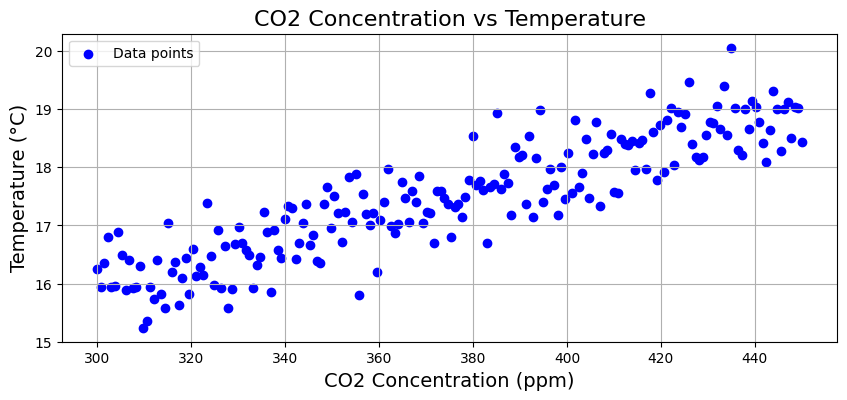

In [31]:
# Plot CO2 concentration vs Temperature
plt.figure(figsize=(10,4))
plt.scatter(Tco2['CO2_concentration_ppm'], Tco2['Temperature_Celsius'], color='blue', label='Data points')

# Adding labels and title
plt.title('CO2 Concentration vs Temperature', fontsize=16)
plt.xlabel('CO2 Concentration (ppm)', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

### 3.3.2. Statistical Graphical analysis - Histograms and Correlation <a class="anchor" id="332-StatAnalysisVariable"></a>

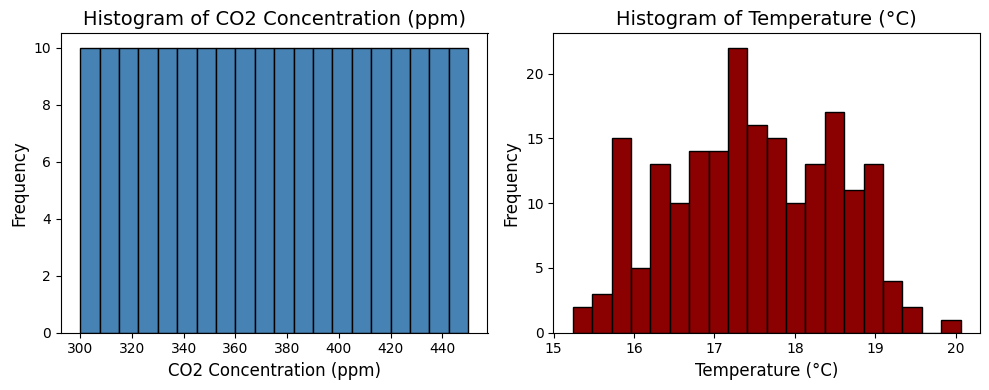

In [33]:
# Plot histogram for CO2 concentration
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(Tco2['CO2_concentration_ppm'], bins=20, color='steelblue', edgecolor='black')
plt.title('Histogram of CO2 Concentration (ppm)', fontsize=14)
plt.xlabel('CO2 Concentration (ppm)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Plot histogram for Temperature
plt.subplot(1, 2, 2)
plt.hist(Tco2['Temperature_Celsius'], bins=20, color='darkred', edgecolor='black')
plt.title('Histogram of Temperature (°C)', fontsize=14)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the histograms
plt.tight_layout()
plt.show()

In the histograms obtained:   

__CO2 Concentration (ppm) Histogram__ (left chart): The CO2 concentration values are evenly distributed across the range from 300 ppm to 450 ppm. Each bin has exactly 10 data points, suggesting the CO2 concentration is uniformly distributed, with no notable variation or skew.   
__Temperature (°C) Histogram__ (right chart): The temperature values appear to follow a roughly normal distribution, with most temperatures falling between 16°C and 19°C. The distribution shows a peak around 17°C, indicating that temperatures near this value are the most frequent. There is some variability in the spread, with fewer observations at the extreme ends (near 15°C and 20°C).   

Overall, the CO2 concentration is uniformly distributed, while the temperature follows a more bell-shaped, normal distribution, which is common in many natural phenomena.

<font size="4"><b>Variable Correlation</b></font>   
Variable correlation measures the strength and direction of a linear relationship between two variables. The correlation coefficient ranges from -1 to 1:   

__1__ indicates a perfect positive correlation: as one variable increases, the other also increases.   
__-1__ indicates a perfect negative correlation: as one variable increases, the other decreases.   
__0__ indicates no correlation: changes in one variable do not predict changes in the other.   

The correlation coefficient between CO2 concentration (in ppm) and global temperature (in Celsius) is approximately __0.889876__, indicating a strong positive correlation. This suggests that as CO2 concentration increases, global temperature also tends to increase.

In [36]:
Tco2.corr()

,CO2_concentration_ppm,Temperature_Celsius
CO2_concentration_ppm,1.000000,0.889876
Temperature_Celsius,0.889876,1.000000


## 3.4. Model Suitability Statistical Tests <a class="anchor" id="34-ModelTests"></a>

To assess the assumptions of linear regression, we need to check the following conditions:

1. __Linearity:__
The relationship between the independent variable (CO2 concentration) and the dependent variable (temperature) should be linear.
We can visually check for linearity by plotting the residuals (errors) versus the fitted values and looking for a random scatter.
2. __Normality of Residuals:__
The residuals (differences between actual and predicted values) should follow a normal distribution. This is important because linear regression assumes that errors are normally distributed.
We can check this using the Shapiro-Wilk test, which tests whether the residuals come from a normal distribution.
3. __Homoscedasticity:__
This means that the residuals should have constant variance across all levels of the independent variable. If the variance of residuals increases or decreases systematically, this violates the assumption.
Breusch-Pagan test can be used to test for homoscedasticity.
4. __Multicollinearity (if there are multiple predictors):__
Multicollinearity refers to the correlation between independent variables. High multicollinearity can lead to unreliable estimates in the regression model.
The Variance Inflation Factor (VIF) is a metric to detect multicollinearity. A VIF value above 5-10 indicates problematic multicollinearity.
___Since we only have one independent variable here (CO2 concentration), VIF doesn't apply. However, I'll include it as part of the explanation for use in models with multiple predictors.___

<font size="4"><b>Linearity</b></font>   
In a linear regression model, one of the key assumptions is that the relationship between the independent variable (in your case, CO2 concentration) and the dependent variable (temperature) is linear. This means that changes in the independent variable should result in proportional changes in the dependent variable.

When checking this assumption, we typically plot residuals (the differences between the actual observed values and the predicted values from the regression model) against the fitted values (the predicted values from the regression). The behavior of the residuals can reveal if the linearity assumption holds.

___Why do we look for randomness in residuals?___
Residuals should be randomly distributed around zero if the model is correctly capturing the relationship between the variables. If the regression model is truly linear, then:

The errors (or residuals) will not systematically increase or decrease as the independent variable changes.
The regression line will describe the central tendency of the data across the entire range of the independent variable.
In such a case, the errors (residuals) are independent and random with respect to the independent variable, which is reflected in a scatter plot of residuals versus fitted values where the points are randomly scattered around the 0 line without forming any visible pattern.

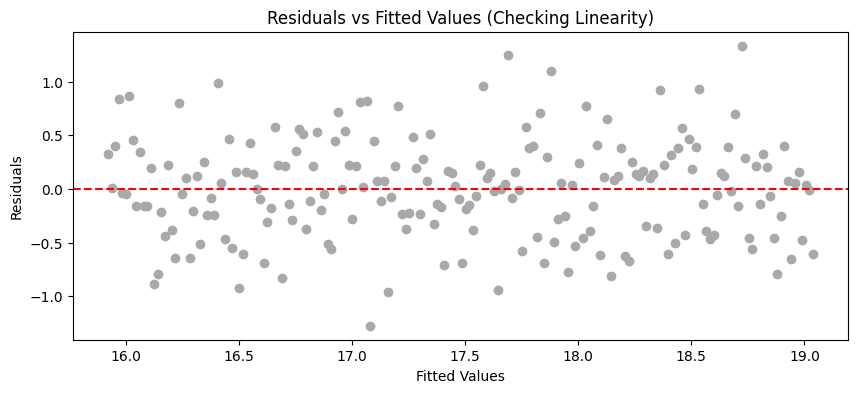

In [40]:
# Define the independent (X) and dependent (Y) variables
X = Tco2['CO2_concentration_ppm']
Y = Tco2['Temperature_Celsius']

# Add a constant term to the independent variable to create an intercept for the model
X_with_constant = sm.add_constant(X)

# Build a linear regression model
model = sm.OLS(Y, X_with_constant).fit()

# Predicted values and residuals
predicted_values = model.predict(X_with_constant)
residuals = Y - predicted_values

### 1. Check for Linearity ###
plt.figure(figsize=(10, 4))
plt.scatter(predicted_values, residuals, color='darkgrey')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values (Checking Linearity)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

This plot shows residuals versus fitted values, and it appears that the residuals are scattered randomly around the red 0-line without any clear pattern.

* __Random Scatter:__ The points do not follow any obvious pattern (e.g., curves, clusters, or funnel shapes), indicating that the linearity assumption holds. The relationship between the independent variable (CO2 concentration) and the dependent variable (temperature) is adequately captured by a linear model.
* __Linearity Assumption:__ Since the residuals are randomly distributed around zero, it suggests that a linear relationship exists between the variables and that the linear regression model is a good fit for this dataset.
This is a good result, showing no significant violations of the linearity assumption.

<font size="4"><b>Normality of Residuals</b></font>   
In a linear regression model, another key assumption is that the residuals (the differences between the observed and predicted values) are __normally distributed__. This assumption is important because it ensures that the model's estimates are unbiased and that statistical tests (like t-tests and F-tests) for significance are valid.

When checking this assumption, we analyze the distribution of residuals using visual tools (e.g., histograms, Q-Q plots) and statistical tests (e.g., Shapiro-Wilk test). The behavior of the residuals helps us determine whether they follow a normal distribution.   
___Why do we look for normality in residuals?___ Residuals should follow a bell-shaped distribution centered around zero if the normality assumption holds. This implies:

- _Symmetry_: The errors are evenly distributed around zero, meaning the model does not overestimate or underestimate systematically.
- _Predictability_: The residuals are likely drawn from a population with normal errors, ensuring reliable predictions.

To check normality we perform the following tasks   

___Shapiro-Wilk Test___: A p-value > 0.05 suggests that residuals are not significantly different from normal. The Shapiro-Wilk test is a statistical test used to determine whether a dataset is normally distributed. It compares the sample data to a perfectly normal distribution and produces two key results: the W statistic, which measures how closely the data matches normality, and the p-value, which indicates the significance of this match. In this context, the p-value helps assess whether the deviations from normality are statistically significant. A p-value > 0.05 suggests that the data does not significantly deviate from normality, meaning we fail to reject the null hypothesis and consider the data approximately normal. Conversely, a p-value ≤ 0.05 means the data significantly deviates from normality, prompting the rejection of the null hypothesis and indicating potential issues such as skewness or outliers. This test is essential for validating assumptions in linear regression and other parametric models.   
___Histogram of Residuals___: A bell-shaped curve indicates approximate normality.   
___Q-Q Plot (Quantile-Quantile Plot)___: Residuals should lie close to a straight diagonal line, confirming that their distribution matches a normal distribution. A _Q-Q plot (Quantile-Quantile plot)_ is a graphical tool used to assess whether a dataset follows a particular theoretical distribution, typically a normal distribution. It compares the quantiles of the observed data (sample quantiles) with the quantiles of a theoretical distribution (e.g., standard normal distribution). In the plot, if the data is normally distributed, the points will align closely with the 45-degree reference line. Deviations from this line indicate departures from normality: points curving away from the line suggest skewness, while S-shaped patterns indicate heavy tails or kurtosis. The Q-Q plot is a quick visual way to check the normality assumption for residuals or any dataset. In a Q-Q plot, quantiles from the sample data are compared to quantiles from a theoretical distribution (e.g., normal). The 45-degree line represents perfect alignment, meaning the data follows the theoretical distribution exactly. Deviations from this line indicate skewness, heavy tails, or other differences from the expected distribution.  

In [43]:
### 1. Check Normality of Residuals using Shapiro-Wilk test ###
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test for Normality of Residuals: {shapiro_test}")

# Null hypothesis (H0): Residuals are normally distributed

Shapiro-Wilk Test for Normality of Residuals: ShapiroResult(statistic=0.9949010610580444, pvalue=0.7354410290718079)


$p-value > 0.05$, so we fail to reject the null hypothesis, meaning the _residuals in this case are approximately normal_.

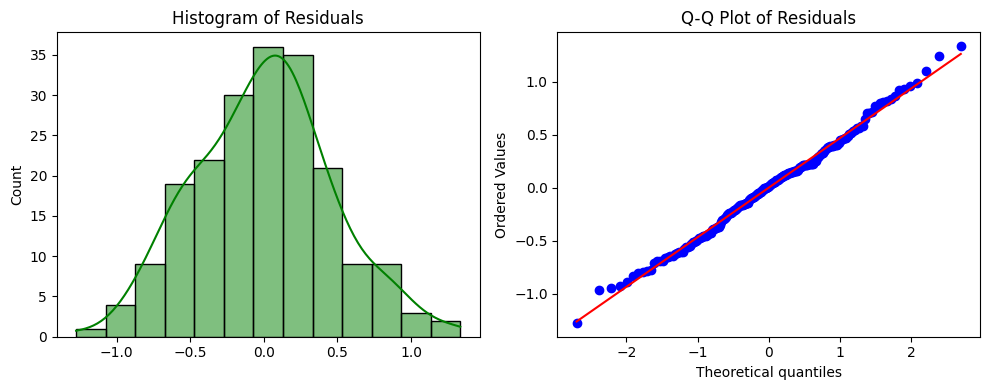

In [45]:
### 2. Histogram of residuals ###
# Create the figure and specify a 2-row, 1-column layout
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(residuals, kde=True, ax=axs[0], color='green')  # Plot residuals with a KDE
axs[0].set_title("Histogram of Residuals")

### 3. Q-Q Plot (Quantile-Quantile Plot)
stats.probplot(residuals, dist="norm", plot=axs[1])  # Generate Q-Q plot
axs[1].set_title("Q-Q Plot of Residuals")

plt.tight_layout()  # Adjust layout so that subplots do not overlap
plt.show()

Explanation of the Results:

* ___Histogram of Residuals (Left):___
The histogram shows that the residuals are roughly symmetric and follow a bell-shaped curve, which is consistent with a normal distribution.
The overlaid green density curve aligns closely with the shape of the histogram, further suggesting normality.   

* ___Q-Q Plot (Right):___
The Q-Q plot compares the residuals to a theoretical normal distribution.
The points mostly lie along the 45-degree red line, indicating that the residuals closely follow a normal distribution.
Minor deviations at the extreme ends suggest some slight departure from normality in the tails, but this is not substantial.

Conclusion:   
__Both the histogram and Q-Q plot suggest that the residuals are approximately normally distributed. This indicates that the normality assumption for linear regression holds well for this dataset. The model is likely appropriate for the data.__

<font size="4"><b>Homoscedasticity</b></font>    
In a linear regression model, homoscedasticity is the assumption that __the variance of residuals is constant__ across all levels of the independent variable. This means the spread of residuals (errors) should remain roughly the same regardless of the value of the predicted (fitted) values. Homoscedasticity ensures that the model's predictions are equally reliable across the entire range of the data.

When checking for homoscedasticity, we typically plot the residuals against the fitted values. If the assumption holds, the residuals will be randomly scattered with equal spread, forming a "cloud" of points. This indicates that the model performs consistently across different levels of the independent variable.   

___Why is Homoscedasticity Important?___    
- _Unbiased Predictions_: If the residual variance is constant, the model's predictions are equally accurate across all values of the independent variable.
- _Valid Inference_: Many statistical tests (e.g., t-tests, F-tests) used in linear regression rely on homoscedasticity for accurate p-values and confidence intervals.

___What Happens When Homoscedasticity is Violated?___ If the residuals show a pattern—such as a funnel shape (increasing or decreasing spread)—it indicates heteroscedasticity. This suggests the model performs better in some ranges of the data and worse in others, leading to Unreliable Predictions (The model may overfit or underfit in certain areas) and Incorrect Inference (Standard errors, p-values, and confidence intervals may become unreliable). In such cases, techniques like data transformation (e.g., logarithmic transformation) or using robust standard errors can be applied to address the issue.

To check for homoscedasticity visually, you plot residuals against fitted values. Alternatively, statistical tests like the Breusch-Pagan test can quantitatively confirm whether the variance of residuals is constant.

First plot (residuals against fitted values) is exactly the same as the one we used for _linearity_. 

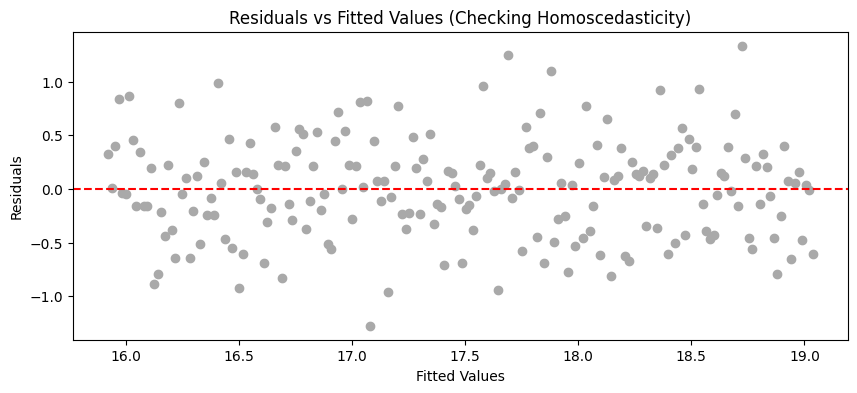

In [49]:
### 1. Check for Linearity ###
plt.figure(figsize=(10, 4))
plt.scatter(predicted_values, residuals, color='darkgrey')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values (Checking Homoscedasticity)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In this case we get:   

* _Random Scatter_: The residuals appear randomly distributed around the horizontal red line (at 0), with no visible pattern or trend. This indicates that the variance of the residuals remains consistent across all levels of the fitted values.
* _No Funnel Shape or Pattern_: There is no sign of a "funnel" shape (increasing or decreasing spread) or systematic clustering, which would suggest heteroscedasticity (non-constant variance).   

Homoscedasticity Holds: Since the residuals maintain approximately equal variance throughout the range of fitted values, the assumption of homoscedasticity appears to be satisfied. The linear regression model's residuals meet the homoscedasticity assumption, indicating the model's predictions are consistent across all levels of the independent variable. No corrective actions (e.g., transformations) are needed.

The __Breusch-Pagan test__ is a statistical test used to detect heteroscedasticity (non-constant variance of residuals) in a regression model. It assesses whether the residual variance is dependent on the independent variable(s). The test works by regressing the squared residuals from the original model on the independent variables and computing the Lagrange Multiplier (LM) statistic, which follows a chi-squared ($\chi^2$) distribution under the null hypothesis. The null hypothesis ($H_0$) assumes homoscedasticity (constant variance), while the alternative hypothesis ($H_1$) suggests heteroscedasticity. A low p-value (≤ 0.05) indicates that the null hypothesis can be rejected, implying evidence of heteroscedasticity. The test quantifies whether the residual variance systematically changes with the predictors.

In [52]:
# Add a constant term to the independent variable for the regression
X_with_constant = sm.add_constant(X)

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(residuals, X_with_constant)

# Extract the test results
bp_labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
bp_results = dict(zip(bp_labels, bp_test))

# Print the results
print("Breusch-Pagan Test Results:")
for key, value in bp_results.items():
    print(f"{key}: {value}")

# Interpretation
if bp_results['p-value'] > 0.05:
    print("Fail to reject the null hypothesis: Homoscedasticity holds.")
else:
    print("Reject the null hypothesis: Evidence of heteroscedasticity.")

Breusch-Pagan Test Results:
Lagrange multiplier statistic: 0.002673100103001147
p-value: 0.9587661181818171
f-value: 0.002646404472489636
f p-value: 0.9590242098055912
Fail to reject the null hypothesis: Homoscedasticity holds.


Here are the results and their interpretations:

__Lagrange Multiplier Statistic (LM): 0.0027__   
This statistic quantifies the relationship between the squared residuals and the independent variables. A very small value, like this one, indicates minimal evidence of heteroscedasticity.

__p-value: 0.9588__   
The p-value represents the probability of observing the given test statistic (or something more extreme) if the null hypothesis is true. Since $p-value = 0.9588 > 0.05$, we fail to reject the null hypothesis ($H_0$) meaning there is no significant evidence of heteroscedasticity

__f-value: 0.0026__   
The F-statistic is another measure used to assess the variance explained by the auxiliary regression. A very small value further confirms no significant relationship between the squared residuals and the independent variables.

__f p-value: 0.9590__   
Similar to the p-value, the F-test p-value indicates the same result $0.9590 > 0.05$, so we fail to reject $H_0$.   

The test results strongly suggest that the null hypothesis ($H_0$) of homoscedasticity holds. The residuals have constant variance across all levels of the independent variable, and no corrective actions (e.g., transformation or weighted regression) are required. The linear regression model meets the assumption of homoscedasticity.

# 4. Model Training <a class="anchor" id="4-Train"></a>

In [55]:
# Defining the independent (X) and dependent (Y) variables
X = Tco2['CO2_concentration_ppm']
Y = Tco2['Temperature_Celsius']

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X.values.reshape(-1, 1), Y, test_size=0.2, random_state=42
)

# Training the linear regression model
X_train_with_const = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_with_const).fit()

<font size="4"><b>Step 1: Define the Independent (X) and Dependent (Y) Variables</b></font>  
```python
# Defining the independent (X) and dependent (Y) variables
X = Tco2['CO2_concentration_ppm']
Y = Tco2['Temperature_Celsius']
```
* __X__: The independent variable (also called the predictor or input), which in this case is the CO2 concentration in parts per million (ppm). This variable is used to predict the dependent variable.   
* __Y__: The dependent variable (also called the target or output), which in this case is the temperature in degrees Celsius (°C). This is the variable we want to predict based on X.

<font size="4"><b>Step 2: Splitting the Dataset into Training and Testing Sets</b></font>  
```python
# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X.values.reshape(-1, 1), Y, test_size=0.2, random_state=42
)
```
The dataset is split into two parts:
* __Training Set (80%)__: Used to train the linear regression model by learning the relationship between X and Y.   
* __Testing Set (20%):__ Used to evaluate the model's performance on unseen data, ensuring that the model generalizes well.

Parameters:   
* _X.values.reshape(-1, 1)_: Converts the X column into a 2D array (required by the train_test_split() function). The shape changes from (n,) to (n, 1), where n is the number of observations.   
* _Y_: The target variable remains as a 1D array.   
* _test_size=0.2_: Specifies that 20% of the data will be used for testing, and the remaining 80% for training.   
* _random_state=42_: Ensures reproducibility by using the same random split every time the code is run.   

Outputs:   
___X_train___: The independent variable for training the model (80% of X).   
___X_test___: The independent variable for testing the model (20% of X).   
___y_train___: The dependent variable for training the model (80% of Y).   
___y_test___: The dependent variable for testing the model (20% of Y).   

<font size="4"><b>Step 3: Train the Linear Regression Model</b></font>  
```python
# Training the linear regression model
X_train_with_const = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_with_const).fit()
```
__sm.OLS()__: Creates an instance of the ordinary least squares (OLS) regression model from the statsmodels library. The OLS model fits a straight line to the data using the formula:: $Y=\beta_0 + \beta_1X$

Where:   
$\beta_0$: Intercept (value of Y when X=0).   
$\beta_1$: Slope (rate of change of Y for a unit change in X).   

__fit(y_train, X_train_with_const)__:   
Fits the OLS model to the training data (y_train, X_train_with_const) by calculating the optimal values for $\beta_0$ and $\beta_1$ using the least squares method.

The model learns the relationship between the CO2 concentration and temperature based on the training data.

# 5. Model Predictions <a class="anchor" id="5-Pred"></a>

In [60]:
# Making predictions on the test set
X_test_with_const = sm.add_constant(X_test)
y_pred = model_sm.predict(X_test_with_const)

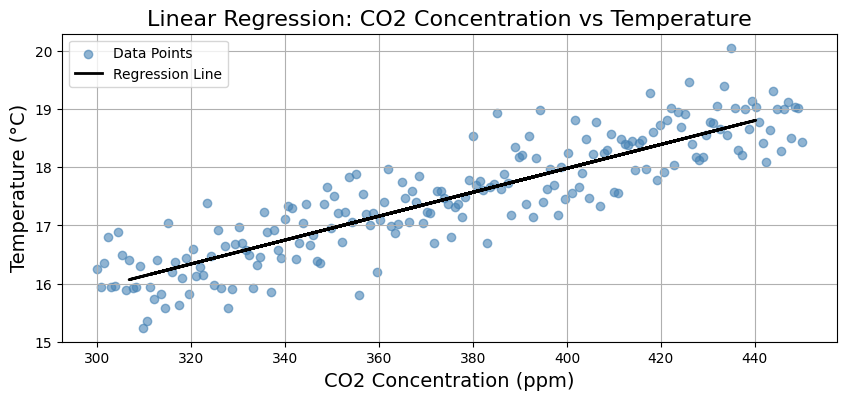

In [61]:
# Plotting the original data and the regression line
plt.figure(figsize=(10, 4))

# Scatter plot of the original data points
plt.scatter(X, Y, color='steelblue', label='Data Points', alpha=0.6)

# Plotting the regression line
plt.plot(X_test, y_pred, color='black', linewidth=2, label='Regression Line')

# Adding labels, title, and legend
plt.title('Linear Regression: CO2 Concentration vs Temperature', fontsize=16)
plt.xlabel('CO2 Concentration (ppm)', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

<font size="4"><b>Prediction of Test Set Values</b></font>  
```python
# Making predictions on the test set
X_test_with_const = sm.add_constant(X_test)
y_pred = model_sm.predict(X_test_with_const)
```

__mmodel_sm.predict()__: Uses the trained linear regression model to predict the dependent variable (_Temperature_Celsius_) based on the independent variable values from the test set (X_test_with_const).   
__X_test_with_const__: Contains unseen CO2 concentration values from the test set. The model generates corresponding temperature predictions (y_pred) using the learned relationship: $\hat{Y} = \beta_0 + \beta_1X$   
__y_pred__: Stores the predicted temperature values.

# 6. Model Results and Evaluation <a class="anchor" id="6-Results"></a>

In [64]:
# Display the model summary
print(model_sm.summary())

                             OLS Regression Results                            
Dep. Variable:     Temperature_Celsius   R-squared:                       0.793
Model:                             OLS   Adj. R-squared:                  0.791
Method:                  Least Squares   F-statistic:                     604.0
Date:                 Sat, 16 Nov 2024   Prob (F-statistic):           7.44e-56
Time:                         18:34:25   Log-Likelihood:                -105.95
No. Observations:                  160   AIC:                             215.9
Df Residuals:                      158   BIC:                             222.1
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7580      0.316     30.91

Here’s a detailed explanation of the OLS Regression Results output:   
***
<font size="4"><b>Model Summary</b></font>  
__Dependent Variable__: Temperature_Celsius. This is the variable the model is trying to predict.   
__R-squared__: 0.792. This indicates that 79.2% of the variance in the dependent variable (temperature) is explained by the independent variable (CO2 concentration).   
__Adjusted R-squared__: 0.791. Adjusted R-squared is especially valuable in models with multiple predictors, as it discourages overfitting by ensuring that only meaningful predictors improve the value. For this case, simple linear regression (one predictor), Adjusted R-squared is close to R-squared, as there is no additional complexity to penalize. In this model, the Adjusted R-squared value of 0.791 suggests that the model is well-fitted and that CO2 concentration is a strong predictor of temperature without unnecessary complexity.   
__F-statistic__: 753.4. A high F-statistic value suggests that the regression model explains a significant amount of the variance in the dependent variable compared to random noise. Generally, F-values greater than 10 are considered significant in many cases. For models with one predictor and a high sample size, F-values much higher than this (e.g., $F>100$) are not uncommon for strong predictors. Accompanied by an extremely small p-value (next result), this confirms that the model is statistically significant.   
__Prob (F-statistic)__: 2.07e-69. The p-value associated with the F-statistic quantifies the probability of observing such a large F-statistic under the null hypothesis that the predictors have no effect. A p-value of 2.07e−69 (extremely small) strongly rejects the null hypothesis, confirming that the overall model is statistically significant and the independent variable(s) meaningfully explain the variance in the dependent variable.   
__Log-Likelihood__: -129.85. The log-likelihood measures how well the model fits the data, with higher (or less negative) values indicating a better fit. A value of −129.85 suggests a reasonable fit but reflects some error in predicting the dependent variable, as no model perfectly predicts real-world data. It is mainly used to compare models rather than assess fit on its own.   
__AIC (Akaike Information Criterion)__: 263.7. The AIC evaluates model quality by balancing goodness-of-fit and complexity, penalizing models with more parameters. A lower AIC value indicates a better trade-off between fit and simplicity. Here, 263.7 is a good value for a single-predictor model, making it useful for comparing this model with alternative models.   
__BIC (Bayesian Information Criterion)__: 270.3. The BIC is similar to AIC but applies a stronger penalty for additional parameters to discourage overfitting. A lower BIC value indicates a better model, and 270.3 suggests this model is both parsimonious and provides a good fit. It is particularly useful for comparing models when the sample size is large.   
***
<font size="4"><b>Coefficients Table</b></font>  
| Variable                  | Coefficient  | Std. Error | t-statistic   | P>[t]   | 
|:--------------------------|:-------------|:-----------|---------------|--------:|
| __Intercept (const)__     | 9.6946       | 0.286      | 33.952        | 0.000   |
| __CO2_concentration_ppm__ | 0.0208       | 0.001      | 27.448        | 0.000   |   

__Intercept (const): 9.6946__.   
- This is the value of temperature (°C) when CO2 concentration is 0 ppm.   
- A small standard error (0.286) indicates that the intercept estimate is precise.   
- The t-statistic (33.952) is very high, showing strong evidence that the intercept is significantly different from zero.   
- The p-value (0.000) confirms that the intercept is statistically significant.   
- The 95% confidence interval ([9.132, 10.258]) means we are 95% confident that the true intercept lies within this range.   

__CO2_concentration_ppm: 0.0208__   
- This is the slope, indicating that for every 1 ppm increase in CO2 concentration, the temperature is predicted to increase by 0.0208°C.   
- The small standard error (0.001) suggests the slope estimate is highly precise.   
- The t-statistic (27.448) is very large, meaning there is strong evidence that CO2 concentration significantly impacts temperature.   
- The p-value (0.000) confirms the slope is statistically significant.   
- The 95% confidence interval ([0.019, 0.022]) indicates we are 95% confident that the true slope lies within this range.

***
<font size="4"><b>Model Diagnostics</b></font>  
| **Test**           | **Value** | **Explanation**                                                                                                                                  |
|---------------------|-----------|--------------------------------------------------------------------------------------------------------------------------------------------------|
| **Omnibus**         | 0.649     | The Omnibus test checks whether the residuals are normally distributed. A small test statistic and a high p-value (> 0.05) suggest no significant deviation from normality. In this model, the value indicates that the residuals are approximately normal. |
| **Prob (Omnibus)**  | 0.723     | The p-value associated with the Omnibus test. A high p-value (> 0.05) confirms that the residuals are not significantly different from a normal distribution. Here, p = 0.723 strongly supports the normality assumption for the residuals. |
| **Durbin-Watson**   | 2.105     | The Durbin-Watson test detects autocorrelation in the residuals. Values close to 2 indicate no significant autocorrelation, which is ideal for regression. With a value of 2.105, this model shows no evidence of residual autocorrelation, suggesting that the residuals are independent. |
| **Jarque-Bera (JB)**| 0.631     | The Jarque-Bera test is another test for normality, focusing on skewness and kurtosis of residuals. A small test statistic and a high p-value (> 0.05) indicate that residuals are normally distributed. Here, the value supports the normality assumption, consistent with the Omnibus test. |
| **Prob (JB)**       | 0.729     | The p-value for the Jarque-Bera test. A high value (> 0.05) confirms no significant deviation from normality. The result strengthens the conclusion that the residuals meet the normality assumption. |
| **Skew**            | 0.135     | Skew measures the asymmetry of the residuals. A value close to 0 indicates that the residuals are symmetrically distributed around the mean. Here, the value of 0.135 shows negligible skewness, supporting the normality assumption. |
| **Kurtosis**        | 2.946     | Kurtosis measures the "tailedness" of the residuals. A value close to 3 indicates normality (mesokurtic distribution). The kurtosis of 2.946 is very close to 3, further supporting the residuals' normality. |
| **Condition Number**| 3.27e+03  | The condition number tests for multicollinearity among predictors. A high value (> 30) suggests possible multicollinearity issues. Here, the large value reflects the wide range of CO2 concentrations (300–450 ppm), but since this is a single-predictor model, it is not concerning. |

***
___As the final conclusions the OLS regression analysis demonstrates that CO2 concentration is a significant predictor of temperature, explaining 79.2% of the variance with a well-fitted model. All key assumptions, including normality, independence, and the absence of significant multicollinearity, are satisfied based on diagnostic tests. Overall, the model is statistically robust and reliable for understanding the relationship between CO2 concentration and temperature.___
***